In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
directory = 'Ratings/Mixtral/'
fileName = directory + 'Nous-Capybara-34B-4.0bpw-stories_{}_Ratings_Mixtral_instruct.p'

In [4]:

def getRatings(fileName, ratingsDict):
    ratings  = pickle.load( open( fileName, "rb" ) )


    for key, value in ratings.items():
        index = key.split('_')[1]
        ratingsDict['maxIndex'] = max(ratingsDict['maxIndex'], int(index))  
        
        ratingsDict['Craftsmanship'][key].append(value['craftsmanship'])
        ratingsDict['Creativity'][key].append(value['creativity'])
        ratingsDict['Consistency'][key].append(value['consistency'])

    return ratingsDict



def plotRatings(ratingsDict, criteria):
    scores = np.array(range(10))
    size = ratingsDict['maxIndex'] + 1
    img = np.zeros((size,size), dtype=np.float32)


    baseValueList = []
    for key, value in ratingsDict[criteria].items():
        x,y = key.split('_')   
        value = [np.sum(scores*np.array(v)) for v in value]

        if y == '0':
            baseValueList.append(value)
        x = int(x)
        y = int(y)
        if len(value) > 0:
            img[x, y] = sum(value)/len(value)

    baseValue = np.mean(baseValueList)

    mask = img == 0

    img[mask] = baseValue

    plt.figure()
    
    img = img + (5 - baseValue)

    plt.imshow(img, cmap='RdBu', vmin=0, vmax=10)
    plt.colorbar()

    plt.title(criteria)
    plt.ylabel('Repeat start layer')
    plt.xlabel('Repeat stop layer')
    return img, baseValueList   



def print_rating(img):
    print(f"Maximum Value for combined: {np.unravel_index(np.argmax(img), np.array(img).shape)}, with value: {np.max(img)}")

def topN(ratingsDict, n):
    scores = np.array(range(10))

    # Compute averages and store them with keys
    scores = np.array(range(10))
    averages = [(key, np.mean([np.sum(scores*np.array(v)) for v in values])) for key, values in ratingsDict.items()]

    print(f'{averages=}')

    # Sort based on the averages
    averages.sort(key=lambda x: x[1], reverse=True)

    # Select the top n keys and their averages
    top_n_keys_with_averages = averages[:n]

    print(f"Top {n} keys with their averages:")
    for key, avg in top_n_keys_with_averages:
        print(f"Key: {key}, Average: {avg}")



def plotHistograms(ratingsDict1, criteria):
    scores = np.array(range(10))
    baseRatingList = []
    ratingList = []
    for key, value in ratingsDict1[criteria].items():
        ratingList.extend([np.sum(scores*np.array(v)) for v in value if key.split('_')[1] != '0'])
        baseRatingList.extend([np.sum(scores*np.array(v)) for v in value if key.split('_')[1] == '0'])
    plt.figure()

    print(f'{baseRatingList=}')
    print(len(baseRatingList))
    print(len(ratingList))

    plt.hist(ratingList, bins=100, edgecolor='black')
    plt.axvline(x=np.mean(baseRatingList), color='r', linestyle='--', linewidth=2)
    plt.axvline(x=np.mean(baseRatingList) - np.std(baseRatingList), color='r', linestyle='--', linewidth=1)
    plt.axvline(x=np.mean(baseRatingList) + np.std(baseRatingList), color='r', linestyle='--', linewidth=1)
    # Adding labels and title
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'{criteria} Ratings')
    plt.xlim(0, 10)

    plt.show()

def getStandardDeviation(ratingsDict, criteria):
    ratingList = []
    for l in ratingsDict[criteria].values():
        ratingList.append(np.std(l))

    return np.mean(ratingList)


def getAllRatings(fileName):
    ratingsDict = defaultdict(lambda: defaultdict(list))
    ratingsDict['maxIndex'] = 0
    for i in range(1,11):
        ratingsDict = getRatings(fileName.format(i), ratingsDict)

    craft, craftBaseValueList = plotRatings(ratingsDict, 'Craftsmanship')
    creat,  creatBaseValueList = plotRatings(ratingsDict, 'Creativity')
    consist, consistBaseValueList = plotRatings(ratingsDict, 'Consistency')

    plt.figure()

    combined = (craft + creat + consist)/3
    plt.imshow(combined, cmap='RdBu', vmin=0, vmax=10)
    # Adding labels and title
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title(f'Combined Ratings')
    return ratingsDict


def plotAllHistograms(ratingsDict):
    plotHistograms(ratingsDict, 'Craftsmanship')
    plotHistograms(ratingsDict, 'Creativity')
    plotHistograms(ratingsDict, 'Consistency')
    

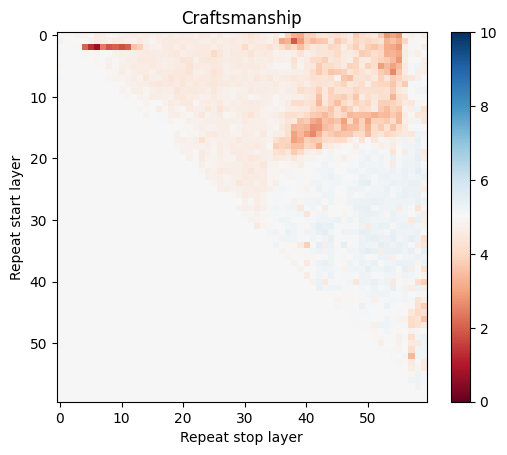

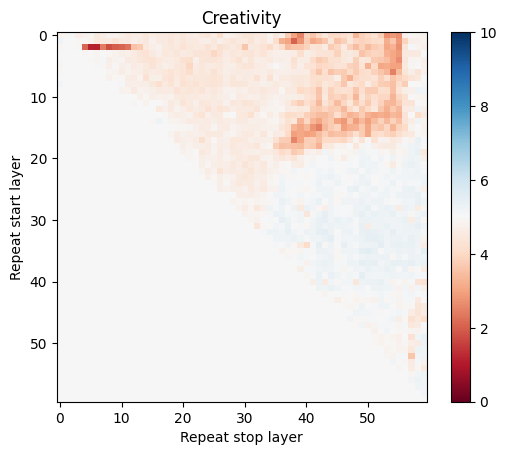

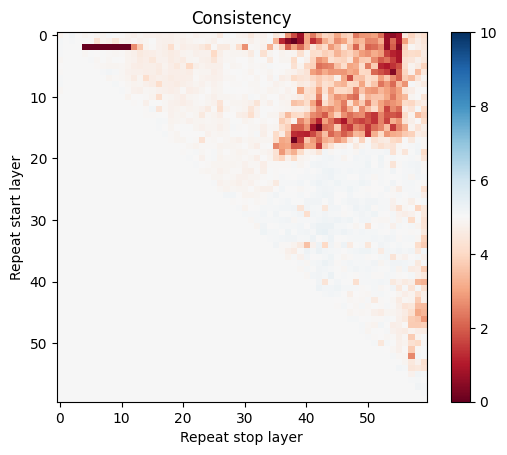

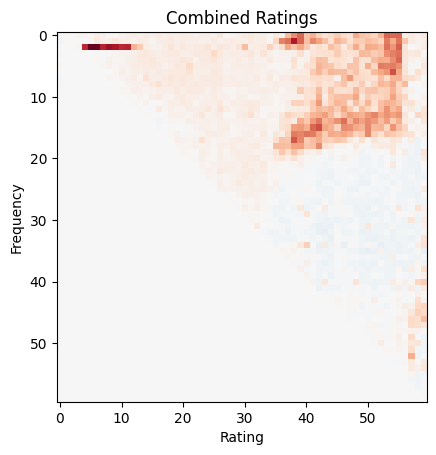

In [5]:
nousMixtral = getAllRatings(fileName)

In [46]:
def getStandardDeviation(ratingsDict, criteria):

    # ratingList = []

    # for l in ratingsDict[criteria].values():
    #     ratingList.append(np.std(l))

    int_std = []
    array_std = []
    int_mean = []
    array_mean = []
    scores = np.array(range(10))
    # print(len(nousMixtral['Craftsmanship'].items()))

    # # for
    # # for key, value in nousMixtral['Craftsmanship'].items():
        
    #     arrayVal = [np.sum(scores*np.array(v)) for v in value]
    #     intVal = [np.argmax(v) for v in value]

    #     int_std.append(np.std(intVal))
    #     array_std.append(np.std(arrayVal))
    #     int_mean.append(np.mean(intVal))
    #     array_mean.append(np.mean(arrayVal))

    for key, value in ratingsDict[criteria].items():
        arrayVal = [np.sum(scores*np.array(v)) for v in value]
        intVal = [np.argmax(v) for v in value]

        int_std.append(np.std(intVal))
        array_std.append(np.std(arrayVal))
        int_mean.append(np.mean(intVal))
        array_mean.append(np.mean(arrayVal))
    # for key, value in nousMixtral['Craftsmanship'].items():
        
    #     arrayVal = [np.sum(scores*np.array(v)) for v in value]
    #     intVal = [np.argmax(v) for v in value]

    #     int_std.append(np.std(intVal))
    #     array_std.append(np.std(arrayVal))
    #     int_mean.append(np.mean(intVal))
    #     array_mean.append(np.mean(arrayVal))

    print(np.mean(int_std))
    print(np.mean(array_std))

    print(np.mean(int_mean))
    print(np.mean(array_mean))
    # print(f'{np.mean(ratingList)=}')
    # print(ratingList)
    # return np.mean(ratingList)
getStandardDeviation(nousMixtral, "Craftsmanship")
getStandardDeviation(nousMixtral, "Creativity")
getStandardDeviation(nousMixtral, "Consistency")

0.6235373010024815
0.5622156096047132
6.13129213483146
6.1854551236426625
0.7619870770746459
0.6517112210296335
5.273258426966291
5.357757351957219
0.9193109345978393
0.8567381951026958
7.3367415730337076
7.327673553561019


In [48]:
getStandardDeviation(mistralMixtral, "Craftsmanship")
getStandardDeviation(mistralMixtral, "Creativity")
getStandardDeviation(mistralMixtral, "Consistency")

0.562795289026987
0.44504496915318986
6.160276679841897
6.264605039911175
0.5531910943853002
0.46907789031123026
5.213438735177865
5.335868294363871
0.47286797278118325
0.4276602491134683
7.722332015810276
7.647582419709463


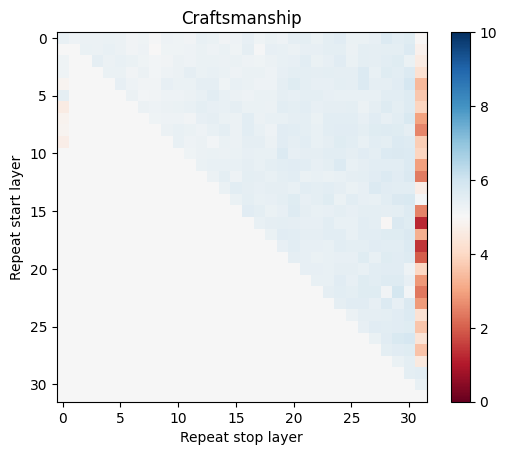

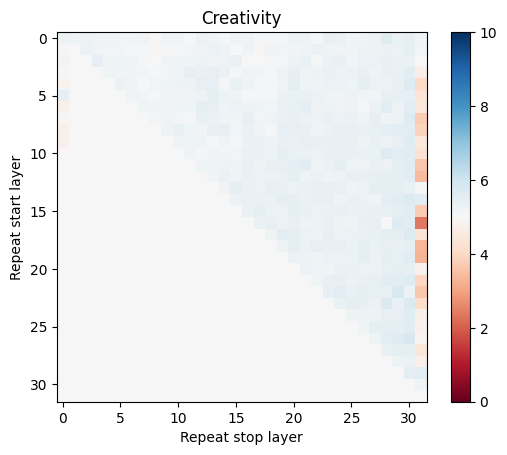

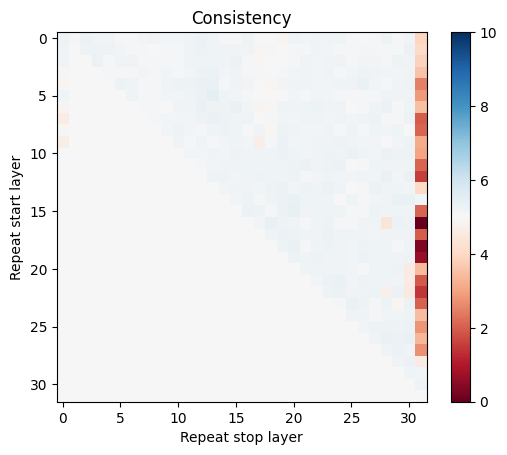

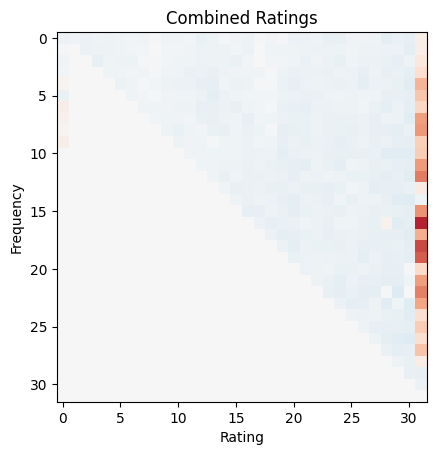

In [47]:
directory = 'Ratings/Mixtral/'
fileName = directory + 'Mistral-7B-Instruct-v0.2-stories_{}_Ratings_Mixtral_instruct.p'
#                       Mistral-7B-Instruct-v0.2-stories_1_Ratings_Mixtral_instruct
                      # Mistral-7B-Instruct-v0.2-stories_1 _Ratings_Mistral_mistral_instruct
mistralMixtral = getAllRatings(fileName)